In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
insurance=pd.read_csv(r'C:\Users\DELL\Downloads\insurance.csv')

In [3]:
insurance = pd.get_dummies(insurance, drop_first=True)

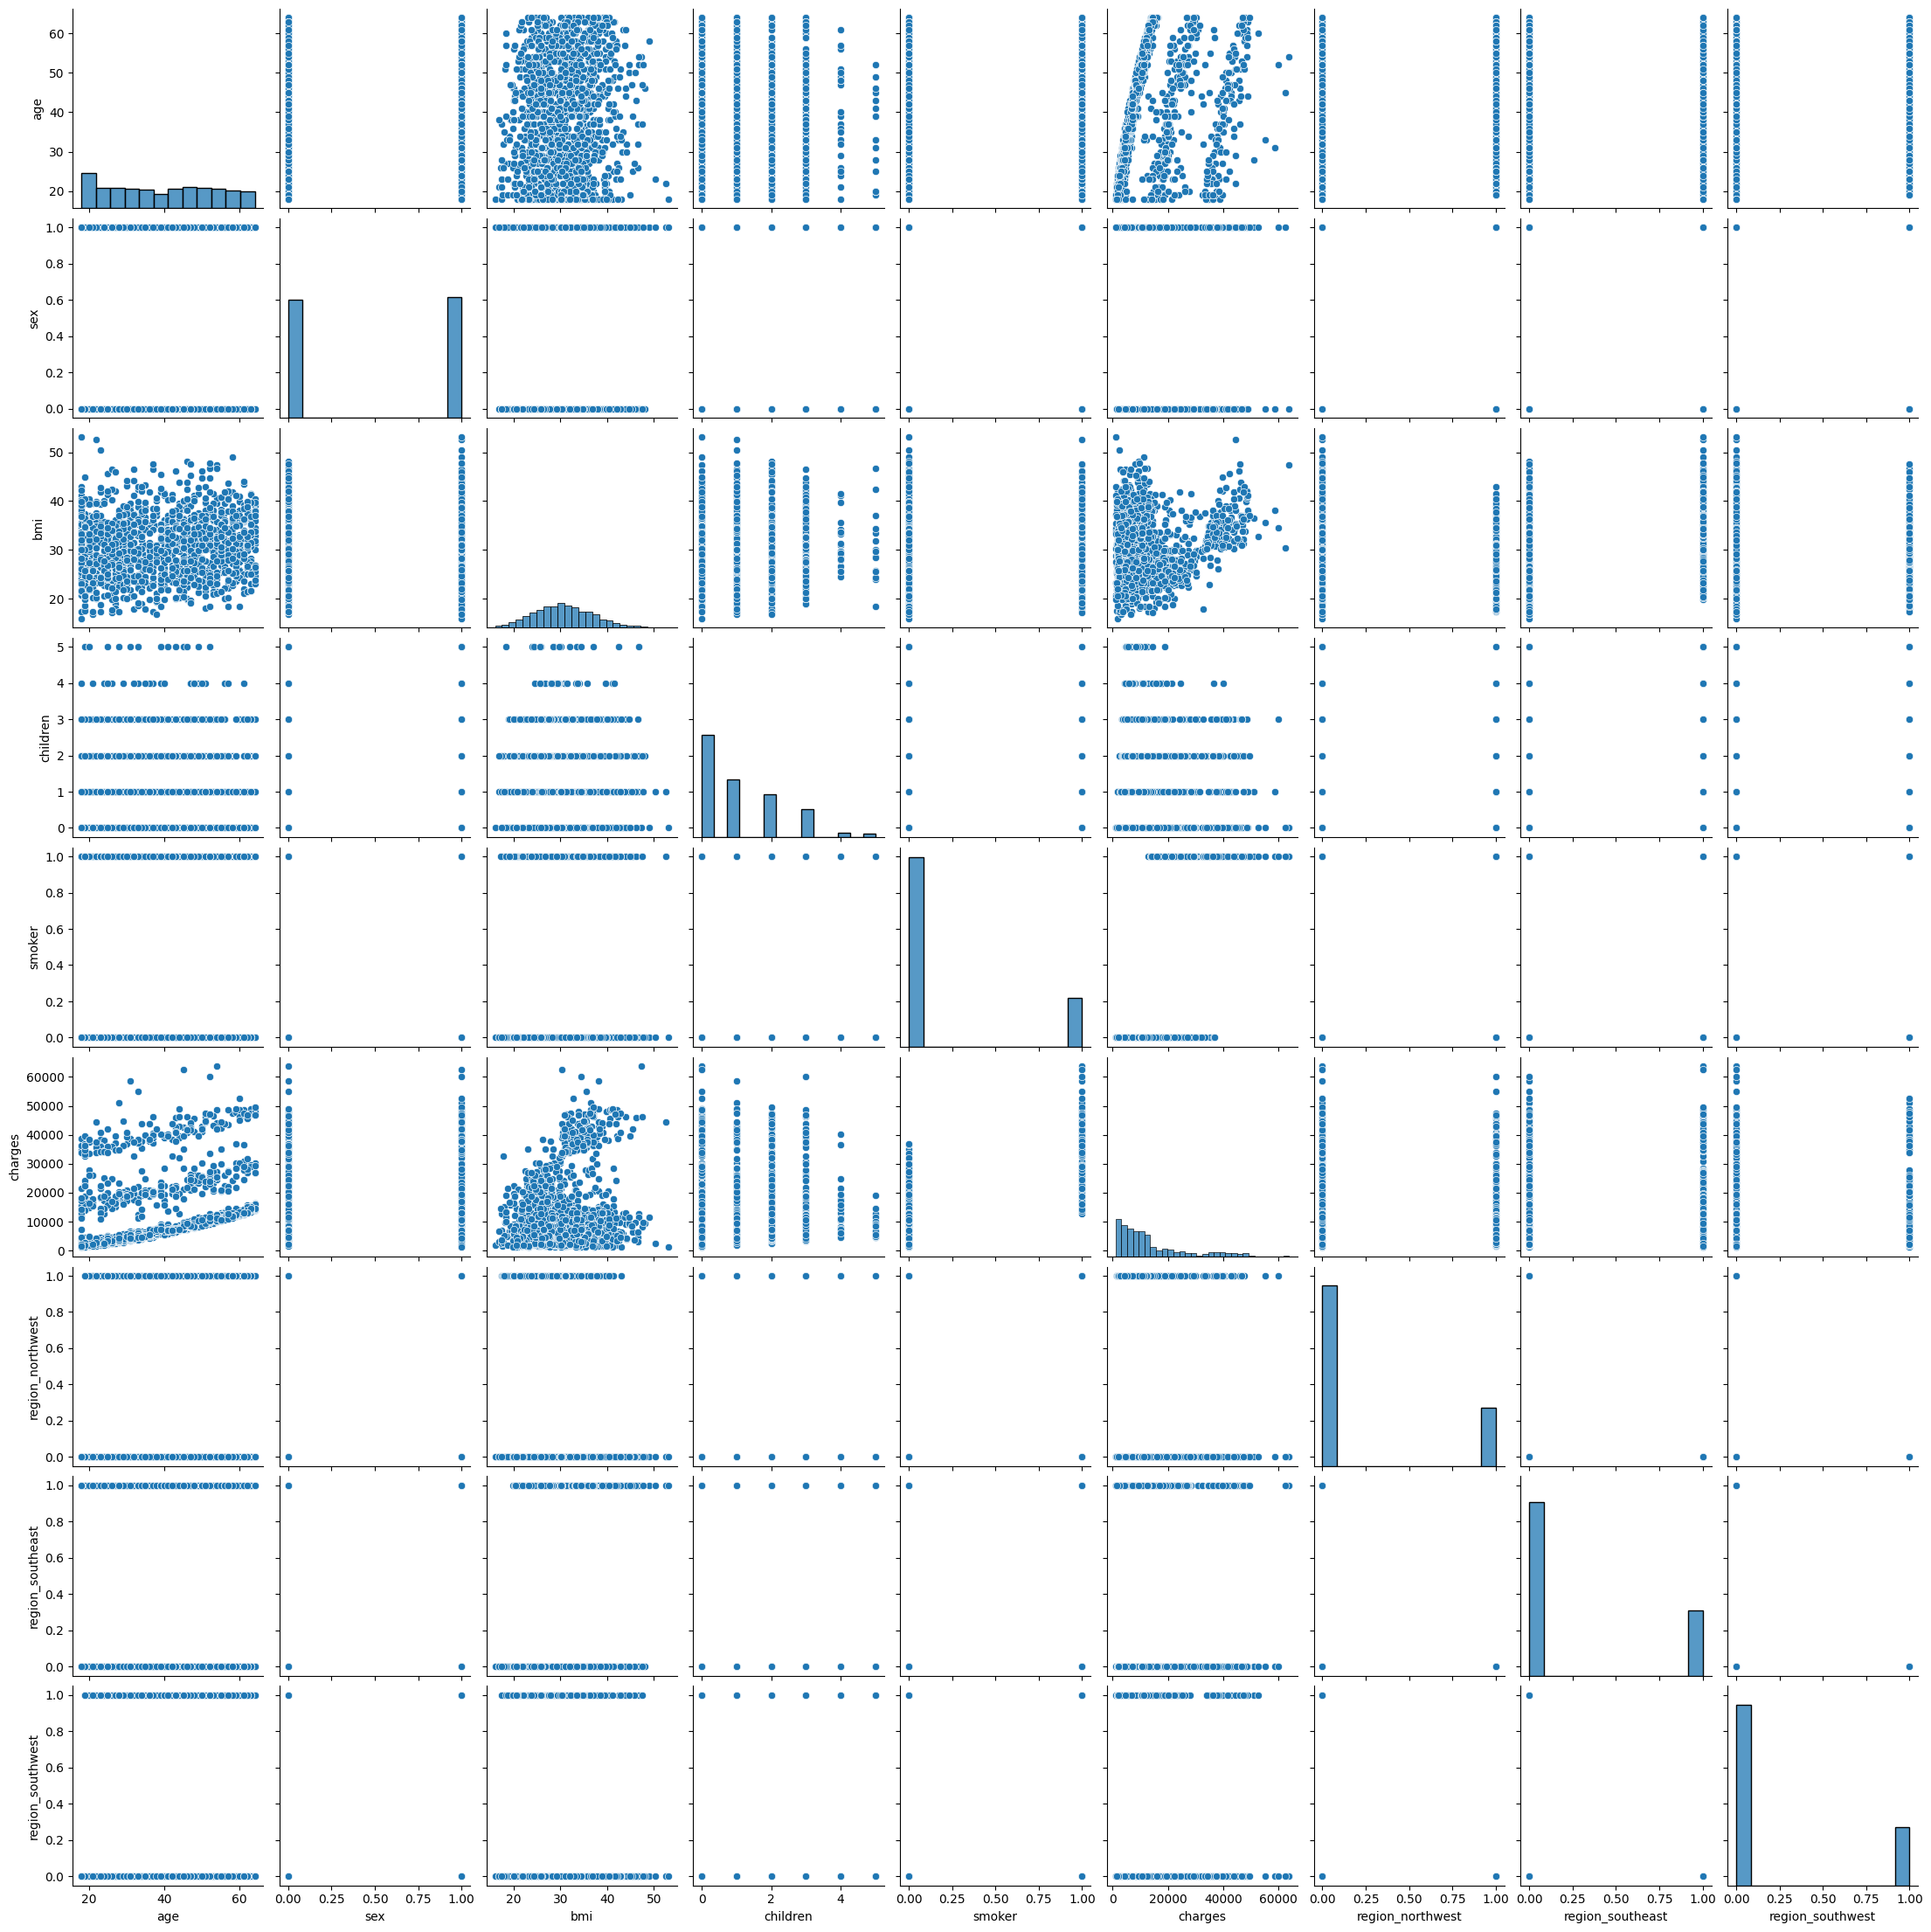

In [4]:
sns.pairplot(insurance)
plt.show()

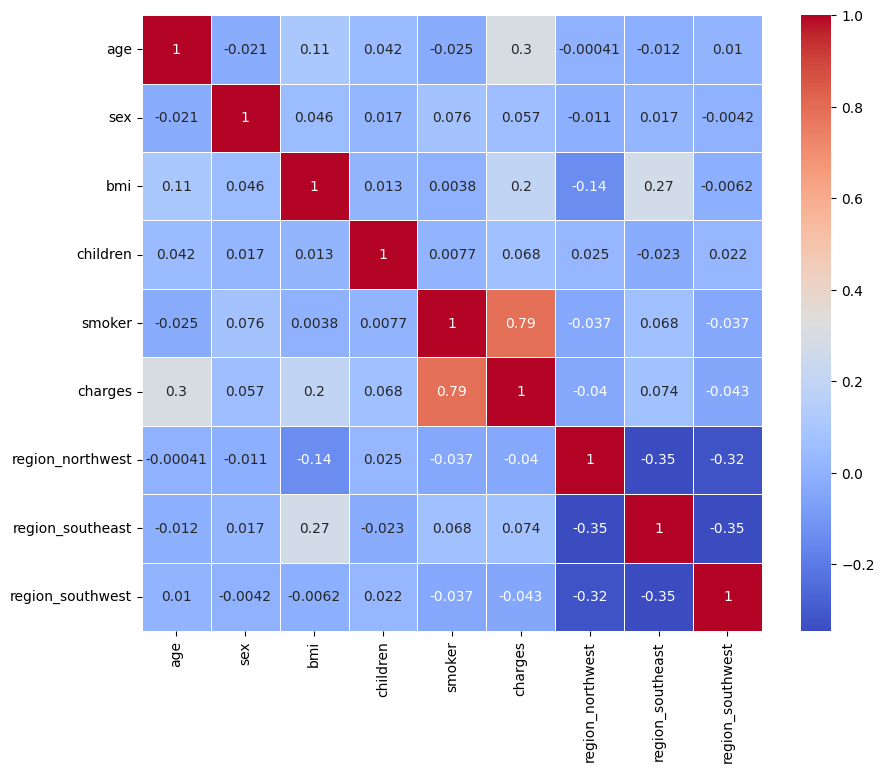

In [5]:
plt.figure(figsize=(10, 8))
sns.heatmap(insurance.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

In [6]:
np.random.seed(144)
Train, Test = train_test_split(insurance, test_size=0.3, random_state=144)

In [7]:
SST = np.sum((Test['charges'] - np.mean(insurance['charges'])) ** 2)
print("SST:", SST)

SST: 60766042870.02519


In [8]:
Linear_Regression_Model = LinearRegression()
X_train = Train.drop('charges', axis=1)
y_train = Train['charges']
X_test = Test.drop('charges', axis=1)
y_test = Test['charges']

In [9]:
Linear_Regression_Model.fit(X_train, y_train)
Prediction = Linear_Regression_Model.predict(X_test)

In [10]:
SSE = np.sum((y_test - Prediction) ** 2)
R2 = 1 - SSE/SST
print("Linear Regression R2:", R2)

Linear Regression R2: 0.7777808217128561


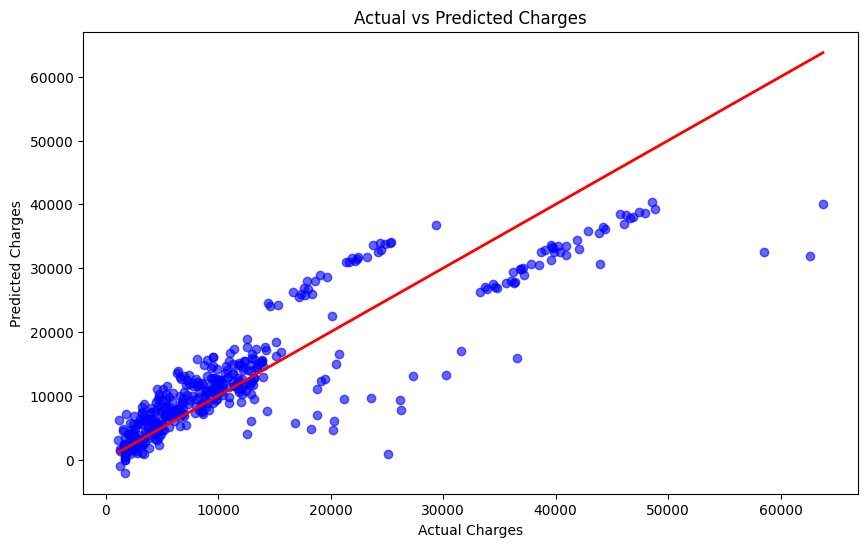

In [11]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, Prediction, alpha=0.6, color='b')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Charges')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.show()

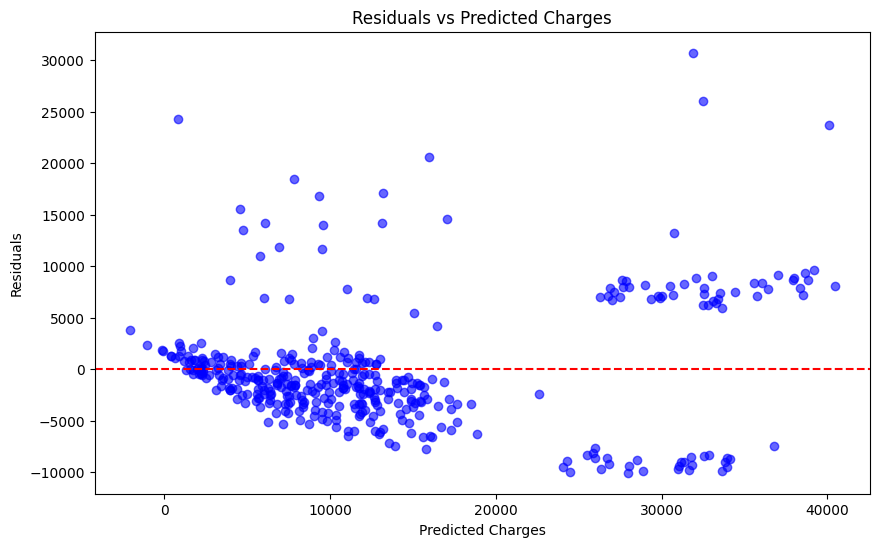

In [12]:
residuals = y_test - Prediction
plt.figure(figsize=(10, 6))
plt.scatter(Prediction, residuals, alpha=0.6, color='b')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Charges')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Charges')
plt.show()

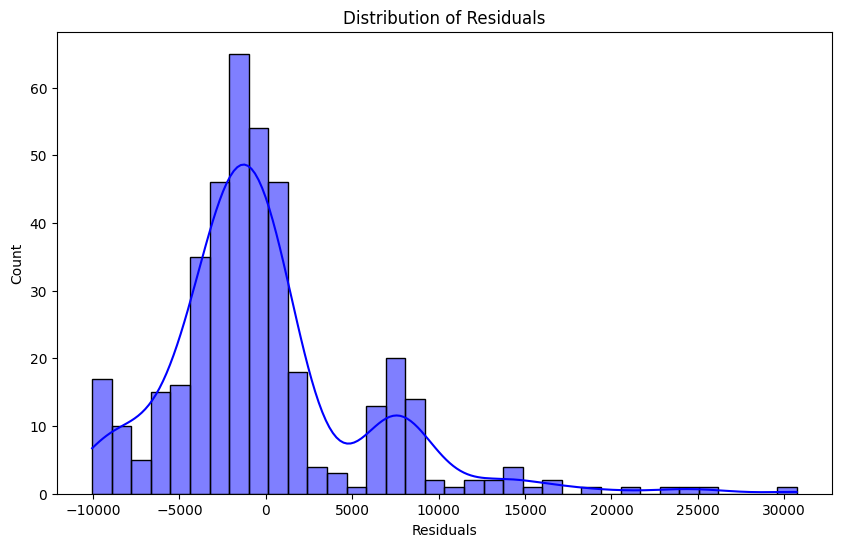

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='blue')
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()

In [14]:
print("Mean Squared Error:", mean_squared_error(y_test, Prediction))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, Prediction)))
print("R2 Score:", r2_score(y_test, Prediction))

Mean Squared Error: 33590497.79686159
Root Mean Squared Error: 5795.730997627615
R2 Score: 0.7776085461882098
